<a href="https://colab.research.google.com/github/machiwao/pjdsc-optima-prime-sakayan-express/blob/main/SakayanExpress_DemandMapping_unstable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sakayan Express - Demand Mapping
Map passenger demand on a respective location. Predict number of passengers at a given time

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

## Possible Mapping Sources

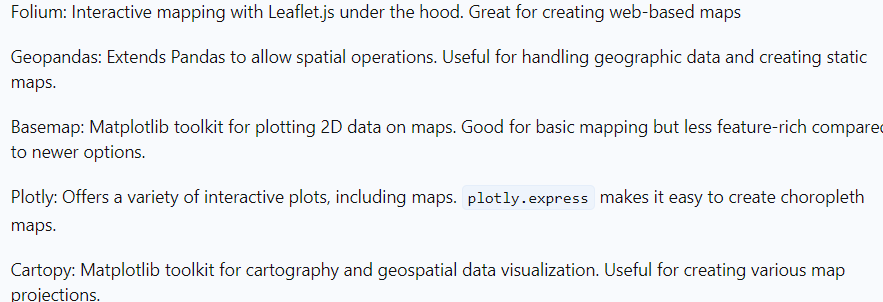

## Dataset Loading

In [486]:
# Raw Data
Belga_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_BELGA_withFuelData.csv"
Deocareza_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_DEOCAREZA_withFuelData.csv"
Graceda_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_GRACEDA_withFuelData.csv"
Manuel_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_MANUEL_withFuelData.csv"
Paralde_0711_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0711_PARALDE_withFuelData.csv"

Carmelotes_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_CARMELOTES_withFuelData.csv"
Escuerdo_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_ESCUERDO_withFuelData.csv"
Graceda_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_GRACEDA_withFuelData.csv"
Neri_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_NERI_withFuelData.csv"
Ostan_0712_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0712_OSTAN_withFuelData.csv"

Bajaro_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_BAJARO.csv"
Escuerdo_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_ESCUERDO_withFuelData.csv"
Graceda_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_GRACEDA_withFuelData.csv"
Neri_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_NERI_withFuelData.csv"
Ostan_0713_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0713_OSTAN_withFuelData.csv"

Belga_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_BELGA_withFuelData.csv"
Caralde_0717_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0717_CARALDE_withFuelData.csv"

Arangco_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_ARANGCO.csv"
Ceballos_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_CEBALLOS.csv"
Delosreyes_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_DELOSREYES.csv"
Fontillas_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_FONTILLAS_withFuelData.csv"
Lina_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_LINA.csv"
Neri_0718_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0718_NERI_withFuelData.csv"

Arango_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_ARANGO.csv"
Bolata_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_BOLATA.csv"
Gipa_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_GIPA.csv"
Loy_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_LOY.csv"
Porquez_0719_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0719_PORQUEZ.csv"

Arango_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_ARANGO.csv"
Gipa_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_GIPA.csv"
Ubusan_0721_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0721_UBUSAN.csv"

Delos_Reyes_0728_url = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/0728_Delos_Reyes.csv"

In [487]:
# Cleaned Data
arango_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arangco_0718.csv"
arango_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0719.csv"
arango_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/arango_0721.csv"
bajaro_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bajaro_0713.csv"
belga_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0711.csv"
belga_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/belga_0717.csv"
bolata_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/bolata_0719.csv"
caralde_0717 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/caralde_0717.csv"
carmelotes_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/carmelotes_0712.csv"
ceballos_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ceballos_0718.csv"
delosreyes_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/delosreyes_0718.csv"
deocareza_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/deocareza_0711.csv"
escuerdos_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0712.csv"
escuerdos_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/escuerdos_0713.csv"
fontillas_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/fontillas_0718.csv"
gipa_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0719.csv"
gipa_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/gipa_0721.csv"
graceda_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0711.csv"
graceda_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0712.csv"
graceda_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/graceda_0713.csv"
lina_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/lina_0718.csv"
loy_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/loy_0719.csv"
manuel_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/manuel_0711.csv"
neri_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0712.csv"
neri_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0713.csv"
neri_0718 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/neri_0718.csv"
ostan_0712 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0712.csv"
ostan_0713 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ostan_0713.csv"
paralde_0711 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/paralde_0711.csv"
porquez_0719 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/porquez_0719.csv"
ubusan_0721 = "https://raw.githubusercontent.com/machiwao/pjdsc-optima-prime-sakayan-express/refs/heads/main/dataset/cleaned/ubusan_0721.csv"

In [488]:
df_1_0711 = pd.read_csv(belga_0711)
df_1_0711['bus_dispatched'] = 3;
df_1_0711['bus_driver'] = 3

df_2_0711 = pd.read_csv(deocareza_0711)
df_2_0711['bus_dispatched'] = 1
df_2_0711['bus_driver'] = 1

df_3_0711 = pd.read_csv(graceda_0711)
df_3_0711['bus_dispatched'] = 2;
df_3_0711['bus_driver'] = 2

df_4_0711 = pd.read_csv(manuel_0711)
df_4_0711['bus_dispatched'] = 4;
df_4_0711['bus_driver'] = 4

df_5_0711 = pd.read_csv(paralde_0711)
df_5_0711['bus_dispatched'] = 5;
df_5_0711['bus_driver'] = 5

df_0711 = pd.concat([df_1_0711, df_2_0711, df_3_0711, df_4_0711, df_5_0711],
                    ignore_index=True)

In [489]:
df_1_0712 = pd.read_csv(graceda_0712)
df_1_0712['bus_dispatched'] = 6;
df_1_0712['bus_driver'] = 2;

df_2_0712 = pd.read_csv(neri_0712)
df_2_0712['bus_dispatched'] =10;
df_2_0712['bus_driver'] = 9;

df_3_0712 = pd.read_csv(ostan_0712)
df_3_0712['bus_dispatched'] = 8;
df_3_0712['bus_driver'] = 7;

df_4_0712 = pd.read_csv(carmelotes_0712)
df_4_0712['bus_dispatched'] = 9;
df_4_0712['bus_driver'] = 8;

df_5_0712 = pd.read_csv(escuerdos_0712)
df_5_0712['bus_dispatched'] = 7;
df_5_0712['bus_driver'] = 6;

df_0712 = pd.concat([df_1_0712, df_2_0712, df_3_0712, df_4_0712, df_5_0712],
                    ignore_index=True)

In [490]:
df_1_0713 = pd.read_csv(escuerdos_0713)
df_1_0713['bus_dispatched'] = 14;
df_1_0713['bus_driver'] = 6;

df_2_0713 = pd.read_csv(neri_0713)
df_2_0713['bus_dispatched'] =13;
df_2_0713['bus_driver'] = 9;

df_3_0713 = pd.read_csv(ostan_0713)
df_3_0713['bus_dispatched'] = 12;
df_3_0713['bus_driver'] = 7;

df_4_0713 = pd.read_csv(graceda_0713)
df_4_0713['bus_dispatched'] = 11;
df_4_0713['bus_driver'] = 2;

df_5_0713 = pd.read_csv(bajaro_0713)
df_5_0713['bus_dispatched'] = 15;
df_5_0713['bus_driver'] = 10;

df_0713 = pd.concat([df_1_0713, df_2_0713, df_3_0713, df_4_0713, df_5_0713],
               ignore_index=True)

In [491]:
df_1_0717 = pd.read_csv(belga_0717)
df_1_0717['bus_dispatched'] = 17;
df_1_0717['bus_driver'] = 3;

df_2_0717 = pd.read_csv(caralde_0717)
df_2_0717['bus_dispatched'] =16;
df_2_0717['bus_driver'] = 11;

df_0717 = pd.concat([df_1_0717, df_2_0717], ignore_index=True)

In [492]:
df_1_0718 = pd.read_csv(arango_0718)
df_1_0718['bus_dispatched'] = 23;
df_1_0718['bus_driver'] = 16;

df_2_0718 = pd.read_csv(neri_0718)
df_2_0718['bus_dispatched'] =18;
df_2_0718['bus_driver'] = 9;

df_3_0718 = pd.read_csv(lina_0718)
df_3_0718['bus_dispatched'] = 20;
df_3_0718['bus_driver'] = 13;

df_4_0718 = pd.read_csv(fontillas_0718)
df_4_0718['bus_dispatched'] = 19;
df_4_0718['bus_driver'] = 12;

df_5_0718 = pd.read_csv(delosreyes_0718)
df_5_0718['bus_dispatched'] = 21;
df_5_0718['bus_driver'] = 14;

df_6_0718 = pd.read_csv(ceballos_0718)
df_6_0718['bus_dispatched'] = 22;
df_6_0718['bus_driver'] = 15;

df_0718 = pd.concat([df_1_0718, df_2_0718, df_3_0718, df_4_0718, df_5_0718,
                df_6_0718], ignore_index=True)

In [493]:
df_1_0719 = pd.read_csv(arango_0719)
df_1_0719['bus_dispatched'] = 27;
df_1_0719['bus_driver'] = 16;

df_2_0719 = pd.read_csv(bolata_0719)
df_2_0719['bus_dispatched'] =28;
df_2_0719['bus_driver'] = 20;

df_3_0719 = pd.read_csv(gipa_0719)
df_3_0719['bus_dispatched'] = 25;
df_3_0719['bus_driver'] = 18;

df_4_0719 = pd.read_csv(loy_0719)
df_4_0719['bus_dispatched'] = 26;
df_4_0719['bus_driver'] = 19;

df_5_0719 = pd.read_csv(porquez_0719)
df_5_0719['bus_dispatched'] = 24;
df_5_0719['bus_driver'] = 17;

df_0719 = pd.concat([df_1_0719, df_2_0719, df_3_0719, df_4_0719, df_5_0719],
                    ignore_index=True)

In [494]:
df_1_0721 = pd.read_csv(arango_0721)
df_1_0721['bus_dispatched'] = 31;
df_1_0721['bus_driver'] = 16;

df_2_0721 = pd.read_csv(gipa_0721)
df_2_0721['bus_dispatched'] =29;
df_2_0721['bus_driver'] = 18;

df_3_0721 = pd.read_csv(ubusan_0721)
df_3_0721['bus_dispatched'] =30;
df_3_0721['bus_driver'] = 21;

df_0721 = pd.concat([df_1_0721, df_2_0721, df_3_0721], ignore_index=True)

In [495]:
df = pd.concat([df_0711, df_0712, df_0713, df_0717, df_0718, df_0719, df_0721],
               ignore_index=True)

In [496]:
df.sample(10)

longitude   latitude            timestamp  Board  Alight  Numpass  \
1191389  121.052718  14.616263  2023-07-19 17:40:36      0       0     64.0   
1351725  121.044293  14.563680  2023-07-21 09:52:21      0       0     23.0   
1177792  120.997375  14.657040  2023-07-19 13:50:53      0       0     19.0   
529590   121.017635  14.540828  2023-07-13 15:09:58      0       0     30.0   
698082   120.991902  14.507938  2023-07-17 08:51:21      0       0      0.0   
271810   120.991770  14.536915  2023-07-12 14:32:45      0       0     29.0   
1053620  120.983512  14.535237  2023-07-19 16:45:35      0       0     28.0   
187815   120.990677  14.518952  2023-07-11 16:53:44      0       0     24.0   
543643   120.987215  14.657158  2023-07-13 20:58:23      0       0     12.0   
812382   120.994328  14.537515  2023-07-18 15:40:43      0       0     13.0   

         Hour   Min   Sec  Day_of_week  ...   direction  QuarterHour  \
1191389  17.0  40.0  36.0            2  ...  Northbound            7   
1351725   9.0  52.0  21.0            4  ...  Southbound            9   
1177792  13.0  50.0  53.0            2  ...  Southbound            9   
529590   15.0   9.0  58.0            3  ...  Northbound            1   
698082    8.0  51.0  21.0            0  ...  Southbound            9   
271810   14.0  32.0  45.0            2  ...  Southbound            5   
1053620  16.0  45.0  35.0            2  ...  Southbound            8   
187815   16.0  53.0  44.0            1  ...  Southbound            9   
543643   20.0  58.0  23.0            3  ...  Northbound           10   
812382   15.0  40.0  43.0            1  ...  Southbound            7   

         northbound_waiting_passengers  southbound_waiting_passengers  \
1191389                            NaN                            NaN   
1351725                            NaN                            NaN   
1177792                            NaN                            NaN   
529590                             NaN                            NaN   
698082                             NaN                            NaN   
271810                             NaN                            NaN   
1053620                            NaN                            NaN   
187815                             0.0                            0.0   
543643                             NaN                            NaN   
812382                             NaN                            NaN   

         bus_dispatched bus_driver  accelY...21  DRIVER        driver  \
1191389              26         19          NaN     NaN           NaN   
1351725              30         21          NaN     NaN           NaN   
1177792              26         19          NaN     NaN           NaN   
529590               12          7          NaN     NaN           NaN   
698082               16         11          NaN     NaN           NaN   
271810                6          2          NaN     NaN           NaN   
1053620              27         16          NaN     NaN           NaN   
187815                4          4          NaN     NaN  Frial Manuel   
543643               12          7          NaN     NaN           NaN   
812382               18          9          NaN     NaN           NaN   

         waiting_passengers  
1191389                 0.0  
1351725                 0.0  
1177792                 0.0  
529590                  0.0  
698082                  0.0  
271810                  0.0  
1053620                 0.0  
187815                  NaN  
543643                  0.0  
812382                  0.0  

[10 rows x 25 columns]

In [497]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [498]:
df.describe()

longitude      latitude         Board        Alight       Numpass  \
count  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06   
mean   1.210164e+02  1.458254e+01  1.202710e-02  1.261060e-02  2.342261e+01   
std    2.480509e-02  5.413315e-02  1.090067e-01  1.115866e-01  1.622190e+01   
min    1.209834e+02  1.450272e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.209914e+02  1.453725e+01  0.000000e+00  0.000000e+00  1.300000e+01   
50%    1.210119e+02  1.456513e+01  0.000000e+00  0.000000e+00  2.100000e+01   
75%    1.210392e+02  1.464474e+01  0.000000e+00  0.000000e+00  3.200000e+01   
max    1.210608e+02  1.473059e+01  1.000000e+00  1.000000e+00  1.240000e+02   

               Hour           Min           Sec   Day_of_week  stop_cluster  \
count  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06  1.374479e+06   
mean   1.317312e+01  2.945211e+01  2.948634e+01  1.879884e+00  9.221755e+00   
std    5.064981e+00  1.725546e+01  1.730206e+01  1.118137e+00  5.879407e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    9.000000e+00  1.500000e+01  1.400000e+01  1.000000e+00  4.000000e+00   
50%    1.300000e+01  2.900000e+01  3.000000e+01  2.000000e+00  9.000000e+00   
75%    1.700000e+01  4.400000e+01  4.400000e+01  3.000000e+00  1.400000e+01   
max    2.300000e+01  5.900000e+01  5.900000e+01  5.000000e+00  2.000000e+01   

       ...  distance_from_cluster_18  dist_change_cluster_0  \
count  ...              1.374479e+06           1.374448e+06   
mean   ...              8.793703e+00          -1.101246e-05   
std    ...              6.115880e+00           4.098702e-01   
min    ...              1.184367e-03          -1.652432e+01   
25%    ...              2.958139e+00           0.000000e+00   
50%    ...              8.417759e+00           0.000000e+00   
75%    ...              1.571583e+01           0.000000e+00   
max    ...              2.513408e+01           1.661382e+01   

       dist_change_cluster_18   QuarterHour  northbound_waiting_passengers  \
count            1.374448e+06  1.374479e+06                  230426.000000   
mean             3.787546e-05  4.568506e+00                       0.059859   
std              5.031941e-01  3.320567e+00                       0.660993   
min             -1.652018e+01  0.000000e+00                       0.000000   
25%              0.000000e+00  1.000000e+00                       0.000000   
50%              0.000000e+00  4.000000e+00                       0.000000   
75%              0.000000e+00  7.000000e+00                       0.000000   
max              1.661288e+01  1.000000e+01                      12.000000   

       southbound_waiting_passengers  bus_dispatched    bus_driver  \
count                  230426.000000    1.374479e+06  1.374479e+06   
mean                        0.041224    1.606601e+01  1.009295e+01   
std                         0.654215    9.194897e+00  6.098520e+00   
min                         0.000000    1.000000e+00  1.000000e+00   
25%                         0.000000    8.000000e+00  5.000000e+00   
50%                         0.000000    1.600000e+01  9.000000e+00   
75%                         0.000000    2.500000e+01  1.600000e+01   
max                        16.000000    3.100000e+01  2.100000e+01   

        accelY...21  waiting_passengers  
count  61611.000000        1.144053e+06  
mean      30.736346        9.058933e-02  
std       57.791832        9.800164e-01  
min     -338.000000        0.000000e+00  
25%        5.000000        0.000000e+00  
50%       15.000000        0.000000e+00  
75%       37.000000        0.000000e+00  
max      866.000000        3.000000e+01  

[8 rows x 21 columns]

In [499]:
df.isnull().sum()

longitude                              0
latitude                               0
timestamp                              0
Board                                  0
Alight                                 0
Numpass                                0
Hour                                   0
Min                                    0
Sec                                    0
Day_of_week                            0
stop_cluster                           0
distance_from_cluster_0                0
distance_from_cluster_18               0
dist_change_cluster_0                 31
dist_change_cluster_18                31
direction                            192
QuarterHour                            0
northbound_waiting_passengers    1144053
southbound_waiting_passengers    1144053
bus_dispatched                         0
bus_driver                             0
accelY...21                      1312868
DRIVER                           1333317
driver                           1339446
waiting_passengers                230426
dtype: int64

In [500]:
df.duplicated().sum()

1154

## Data Cleaning Pipeline

### Commuter Demand Data
Time-based Features: Hour, Min, Sec, Timestamp, Date, Day of the week

Location-based Features: Longitude, latitude

Passenger data: Board, Alight, Numpass

In [501]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1374479 entries, 0 to 1374478
Data columns (total 25 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   longitude                      1374479 non-null  float64
 1   latitude                       1374479 non-null  float64
 2   timestamp                      1374479 non-null  object 
 3   Board                          1374479 non-null  int64  
 4   Alight                         1374479 non-null  int64  
 5   Numpass                        1374479 non-null  float64
 6   Hour                           1374479 non-null  float64
 7   Min                            1374479 non-null  float64
 8   Sec                            1374479 non-null  float64
 9   Day_of_week                    1374479 non-null  int64  
 10  stop_cluster                   1374479 non-null  int64  
 11  distance_from_cluster_0        1374479 non-null  float64
 12  distance_from_

In [502]:
cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec', 'bus_dispatched',
        'bus_driver']
# cols = ['longitude','latitude','timestamp','Board','Alight','Numpass','Hour','Min','Sec']

In [503]:
df = df[cols]

In [504]:
df.sample(10)

longitude   latitude            timestamp  Board  Alight  Numpass  \
428260   121.049443  14.575113  2023-07-13 07:33:11      0       0     37.0   
947684   121.009108  14.538695  2023-07-18 16:24:19      0       0     39.0   
1275341  120.990713  14.522840  2023-07-21 22:33:04      0       0     27.0   
634306   120.992288  14.511322  2023-07-13 17:29:11      0       1     51.0   
323117   121.020758  14.542958  2023-07-12 20:34:42      0       0     22.0   
1215768  120.991733  14.511692  2023-07-19 07:02:18      0       0      0.0   
1332296  120.990878  14.507413  2023-07-21 22:17:49      0       0     13.0   
100901   120.990050  14.528467  2023-07-11 15:31:57      0       0     10.0   
737991   121.053268  14.614667  2023-07-17 20:24:55      0       0     11.0   
104892   121.057175  14.588397  2023-07-11 16:38:46      0       0     39.0   

         Hour   Min   Sec  bus_dispatched  bus_driver  
428260    7.0  33.0  11.0              14           6  
947684   16.0  24.0  19.0              21          14  
1275341  22.0  33.0   4.0              31          16  
634306   17.0  29.0  11.0              15          10  
323117   20.0  34.0  42.0               8           7  
1215768   7.0   2.0  18.0              24          17  
1332296  22.0  17.0  49.0              29          18  
100901   15.0  31.0  57.0               1           1  
737991   20.0  24.0  55.0              16          11  
104892   16.0  38.0  46.0               1           1

In [505]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', errors='coerce')
df['Hour'] = df['timestamp'].dt.hour
df['Min'] = df['timestamp'].dt.minute
df['Sec'] = df['timestamp'].dt.second
df['Time'] = df['timestamp'].dt.time
df['datePH'] = df['timestamp'].dt.date
df['Day_of_week'] = df['timestamp'].dt.dayofweek

In [506]:
df['Board'].ffill(inplace = True)
df['Alight'].ffill(inplace = True)
df['Numpass'].ffill(inplace = True)

In [507]:
df.isna().sum()

longitude         0
latitude          0
timestamp         0
Board             0
Alight            0
Numpass           0
Hour              0
Min               0
Sec               0
bus_dispatched    0
bus_driver        0
Time              0
datePH            0
Day_of_week       0
dtype: int64

In [508]:
df.duplicated().sum()

2381

In [509]:
df.dropna(inplace = True)

In [510]:
df.drop_duplicates(inplace = True)

In [511]:
# Specific Bus Stops
Monumento = (14.658796024391433, 120.98613030490293)
Bagong_Barrio = (14.658962098122908, 120.99840409277799)
Balintawak = (14.657632440251607, 121.00489616829053)
Kaingin = (14.659207715596748, 121.01043239008315)
Roosevelt = (14.65946031850859, 121.01960427287607)
North_Avenue = (14.65718384651016, 121.03239793536257)
Quezon_Avenue = (14.656139926966889, 121.03605665566357)
Mega_Q_Mart = (14.63431675877849, 121.04705854853009)
Main_Avenue = (14.615051484903669, 121.05341714648678)
Santolan = (14.609827993592939, 121.05501086998106)
Ortigas = (14.589274921830608, 121.05698223579455)
Guadalupe = (14.567240858915584, 121.04520617378073)
Buendia = (14.557616094605738, 121.03343011212988)
Ayala = (14.563354406583553, 121.02589656273899)
One_Ayala_Terminal = (14.55058860630776, 121.02789561089271)
Tramo = (14.540645092074023, 121.00359742139625)
Taft_Avenue = (14.538392473279682, 120.99945327510484)
Roxas_Boulevard = (14.538057498309131, 120.99218611080356)
MOA = (14.53684543526199, 120.98357811498406)
Macapagal_Bradco_Avenue = (14.538057498309131, 120.99160935176819)
City_of_Dreams = (14.524975658136254, 120.99059974706373)
Ayala_Malls_Manila_Bay = (14.523068542733853, 120.99008185576514)
PITX_Terminal = (14.510338360322828, 120.99126572649949)

bus_stops = [Monumento, Bagong_Barrio, Balintawak, Kaingin, Roosevelt, North_Avenue,
             Quezon_Avenue, Mega_Q_Mart, Main_Avenue, Santolan, Ortigas, Guadalupe,
             Buendia, Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue, Roxas_Boulevard,
             MOA, Macapagal_Bradco_Avenue, City_of_Dreams, Ayala_Malls_Manila_Bay,
             PITX_Terminal]


In [512]:
'''from sklearn.cluster import KMeans

k = 23 # Currently 23 bus stops in total whether NB or SB

initial_centroids = np.array([Monumento, Bagong_Barrio, Balintawak, Kaingin,
                              Roosevelt, North_Avenue, Quezon_Avenue, Mega_Q_Mart,
                              Main_Avenue, Santolan, Ortigas, Guadalupe, Buendia,
                              Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue,
                              Roxas_Boulevard, MOA, Macapagal_Bradco_Avenue,
                              City_of_Dreams, Ayala_Malls_Manila_Bay, PITX_Terminal])

# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns
kmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1, random_state=42)
# kmeans = KMeans(n_clusters=21, random_state=42)'''

'from sklearn.cluster import KMeans\n\nk = 23 # Currently 23 bus stops in total whether NB or SB\n\ninitial_centroids = np.array([Monumento, Bagong_Barrio, Balintawak, Kaingin,\n                              Roosevelt, North_Avenue, Quezon_Avenue, Mega_Q_Mart,\n                              Main_Avenue, Santolan, Ortigas, Guadalupe, Buendia,\n                              Ayala, One_Ayala_Terminal, Tramo, Taft_Avenue,\n                              Roxas_Boulevard, MOA, Macapagal_Bradco_Avenue,\n                              City_of_Dreams, Ayala_Malls_Manila_Bay, PITX_Terminal])\n\n# Use K-Means clustering to find clusters of stops with potentially similar waiting patterns\nkmeans = KMeans(n_clusters=k, init=initial_centroids, n_init=1, random_state=42)\n# kmeans = KMeans(n_clusters=21, random_state=42)'

In [513]:
from geopy.distance import geodesic

def find_nearest_bus_stop(row, bus_stops):
    passenger_location = (row['latitude'], row['longitude'])
    distances = [geodesic(passenger_location, stop).meters for stop in bus_stops]
    nearest_stop_idx = np.argmin(distances)
    return nearest_stop_idx  # Returns the index of the nearest bus stop

In [514]:
# Apply the function only to rows where Board == True
df.loc[df['Board'] == True, 'nearest_bus_stop'] = df[df['Board'] == True].apply(
    find_nearest_bus_stop, axis=1, bus_stops=bus_stops
)

# Optional: If you want to map to bus stop names, you can add this step
# df.loc[df['Board'] == True, 'nearest_bus_stop_name'] = df.loc[df['Board'] == True, 'nearest_bus_stop'].map(lambda x: bus_stop_names[x])


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372098 entries, 0 to 1374478
Data columns (total 15 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   longitude         1372098 non-null  float64       
 1   latitude          1372098 non-null  float64       
 2   timestamp         1372098 non-null  datetime64[ns]
 3   Board             1372098 non-null  int64         
 4   Alight            1372098 non-null  int64         
 5   Numpass           1372098 non-null  float64       
 6   Hour              1372098 non-null  int32         
 7   Min               1372098 non-null  int32         
 8   Sec               1372098 non-null  int32         
 9   bus_dispatched    1372098 non-null  int64         
 10  bus_driver        1372098 non-null  int64         
 11  Time              1372098 non-null  object        
 12  datePH            1372098 non-null  object        
 13  Day_of_week       1372098 non-null  int32      

In [516]:
df['nearest_bus_stop'].bfill(inplace = True)

In [517]:
df[df['Board']==True]

longitude   latitude           timestamp  Board  Alight  Numpass  \
18       120.988783  14.507963 2023-07-11 04:01:13      1       0     15.0   
28       120.988768  14.507970 2023-07-11 04:01:22      1       0     16.0   
312      120.990620  14.524773 2023-07-11 04:05:48      1       0     16.0   
504      120.988995  14.535418 2023-07-11 04:08:44      1       0     16.0   
524      120.988997  14.535923 2023-07-11 04:09:03      1       0     17.0   
...             ...        ...                 ...    ...     ...      ...   
1373956  121.020132  14.657702 2023-07-21 18:23:32      1       0     51.0   
1373958  121.020132  14.657702 2023-07-21 18:23:33      1       0     52.0   
1373959  121.020132  14.657702 2023-07-21 18:23:34      1       0     53.0   
1373963  121.020132  14.657702 2023-07-21 18:23:37      1       0     54.0   
1373966  121.020132  14.657702 2023-07-21 18:23:39      1       0     55.0   

         Hour  Min  Sec  bus_dispatched  bus_driver      Time      datePH  \
18          4    1   13               3           3  04:01:13  2023-07-11   
28          4    1   22               3           3  04:01:22  2023-07-11   
312         4    5   48               3           3  04:05:48  2023-07-11   
504         4    8   44               3           3  04:08:44  2023-07-11   
524         4    9    3               3           3  04:09:03  2023-07-11   
...       ...  ...  ...             ...         ...       ...         ...   
1373956    18   23   32              30          21  18:23:32  2023-07-21   
1373958    18   23   33              30          21  18:23:33  2023-07-21   
1373959    18   23   34              30          21  18:23:34  2023-07-21   
1373963    18   23   37              30          21  18:23:37  2023-07-21   
1373966    18   23   39              30          21  18:23:39  2023-07-21   

         Day_of_week  nearest_bus_stop  
18                 1              22.0  
28                 1              22.0  
312                1              20.0  
504                1              19.0  
524                1              19.0  
...              ...               ...  
1373956            4               4.0  
1373958            4               4.0  
1373959            4               4.0  
1373963            4               4.0  
1373966            4               4.0  

[16523 rows x 15 columns]

In [518]:
df['Board'] = df['Board'].astype(int)
df['Alight'] = df['Alight'].astype(int)

In [519]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth
    (specified in decimal degrees).
    """
    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = [np.radians(coord) for coord in [lat1, lon1, lat2, lon2]]

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


In [520]:
'''centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")'''

'centroids = kmeans.cluster_centers_\nfor i, centroid in enumerate(centroids):\n    print(f"Cluster {i}: {centroid}")'

In [521]:
df['Day_of_week'] = df['timestamp'].dt.weekday

In [522]:
df.head()

longitude   latitude           timestamp  Board  Alight  Numpass  Hour  \
0  120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0     4   
1  120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0     4   
2  120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0     4   
3  120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0     4   
4  120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0     4   

   Min  Sec  bus_dispatched  bus_driver      Time      datePH  Day_of_week  \
0    0   55               3           3  04:00:55  2023-07-11            1   
1    0   56               3           3  04:00:56  2023-07-11            1   
2    0   57               3           3  04:00:57  2023-07-11            1   
3    0   58               3           3  04:00:58  2023-07-11            1   
4    0   59               3           3  04:00:59  2023-07-11            1   

   nearest_bus_stop  
0              22.0  
1              22.0  
2              22.0  
3              22.0  
4              22.0

In [523]:
# Define the coordinates for the end clusters (example values)
northmost_coords = Monumento  # Example coordinates for cluster 0 (northmost terminal)
southmost_coords = PITX_Terminal  # Example coordinates for cluster 18 (southmost terminal)

def calculate_distance_from_terminals(df):
    """
    Calculates the distance of each bus stop from the two end terminals (cluster 0 and cluster 18).
    Adds columns for distance_from_cluster_0 and distance_from_cluster_18.

    Args:
    - df: DataFrame with latitude and longitude columns

    Returns:
    - DataFrame with added 'distance_from_cluster_0' and 'distance_from_cluster_18' columns
    """
    # Calculate distances from cluster 0 (northmost terminal)
    df['distance_from_north'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], northmost_coords[0], northmost_coords[1]), axis=1)

    # Calculate distances from cluster 18 (southmost terminal)
    df['distance_from_south'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], southmost_coords[0], southmost_coords[1]), axis=1)

    return df

In [524]:
df = calculate_distance_from_terminals(df)

In [525]:
def determine_direction_based_on_terminals(df):
    """
    Determines the bus direction (Northbound or Southbound) based on the proximity
    of the bus to the end terminals (clusters 0 and 18). If the bus is moving closer to
    cluster 0, it's Northbound; if it's moving closer to cluster 18, it's Southbound.

    Args:
    - df: DataFrame that contains 'distance_from_north' and 'distance_from_south' columns

    Returns:
    - DataFrame with a 'direction' column
    """
    # Calculate the difference in distance between consecutive rows to determine direction
    df['dist_change_north'] = df['distance_from_north'].diff()
    df['dist_change_south'] = df['distance_from_south'].diff()

    # Determine direction based on the distance change
    df['direction'] = df.apply(lambda row: 'Northbound' if row['dist_change_north'] < 0 else 'Southbound' if row['dist_change_south'] < 0 else None, axis=1)

    # Forward fill to propagate the last known direction when stationary
    df['direction'] = df['direction'].ffill()
    df['direction'] = df['direction'].bfill()

    return df

In [526]:
df = determine_direction_based_on_terminals(df)
df

longitude   latitude           timestamp  Board  Alight  Numpass  \
0        120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0   
1        120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0   
2        120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0   
3        120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0   
4        120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0   
...             ...        ...                 ...    ...     ...      ...   
1374474  120.986592  14.657210 2023-07-21 18:33:39      0       0      0.0   
1374475  120.986592  14.657210 2023-07-21 18:33:40      0       0      0.0   
1374476  120.986592  14.657210 2023-07-21 18:33:41      0       0      0.0   
1374477  120.986592  14.657210 2023-07-21 18:33:42      0       0      0.0   
1374478  120.986592  14.657210 2023-07-21 18:33:43      0       0      0.0   

         Hour  Min  Sec  bus_dispatched  bus_driver      Time      datePH  \
0           4    0   55               3           3  04:00:55  2023-07-11   
1           4    0   56               3           3  04:00:56  2023-07-11   
2           4    0   57               3           3  04:00:57  2023-07-11   
3           4    0   58               3           3  04:00:58  2023-07-11   
4           4    0   59               3           3  04:00:59  2023-07-11   
...       ...  ...  ...             ...         ...       ...         ...   
1374474    18   33   39              30          21  18:33:39  2023-07-21   
1374475    18   33   40              30          21  18:33:40  2023-07-21   
1374476    18   33   41              30          21  18:33:41  2023-07-21   
1374477    18   33   42              30          21  18:33:42  2023-07-21   
1374478    18   33   43              30          21  18:33:43  2023-07-21   

         Day_of_week  nearest_bus_stop  distance_from_north  \
0                  1              22.0            16.774200   
1                  1              22.0            16.775764   
2                  1              22.0            16.777120   
3                  1              22.0            16.777459   
4                  1              22.0            16.777266   
...              ...               ...                  ...   
1374474            4               NaN             0.183207   
1374475            4               NaN             0.183207   
1374476            4               NaN             0.183207   
1374477            4               NaN             0.183207   
1374478            4               NaN             0.183207   

         distance_from_south  dist_change_north  dist_change_south   direction  
0                   0.356173                NaN                NaN  Northbound  
1                   0.368564           0.001563           0.012392  Northbound  
2                   0.374506           0.001356           0.005942  Northbound  
3                   0.375901           0.000339           0.001395  Northbound  
4                   0.376412          -0.000193           0.000510  Northbound  
...                      ...                ...                ...         ...  
1374474            16.339125           0.000000           0.000000  Northbound  
1374475            16.339125           0.000000           0.000000  Northbound  
1374476            16.339125           0.000000           0.000000  Northbound  
1374477            16.339125           0.000000           0.000000  Northbound  
1374478            16.339125           0.000000           0.000000  Northbound  

[1372098 rows x 20 columns]

In [527]:
def assign_quarter_hour(df):
    """
    Assigns a quarter-hour interval for each row based on the 'Min' (minute) column.
    Divides the 60-minute hour into 15-minute chunks.

    Args:
    - df: DataFrame that contains the 'Min' (minute) column

    Returns:
    - DataFrame with an additional 'QuarterHour' column
    """
    # Define which quarter of the hour the minute falls into
    conditions = [
        (df['Min'] < 5),
        (df['Min'] >= 5) & (df['Min'] < 10),
        (df['Min'] >= 10) & (df['Min'] < 15),
        (df['Min'] >= 15) & (df['Min'] < 20),
        (df['Min'] >= 25) & (df['Min'] < 30),
        (df['Min'] >= 30) & (df['Min'] < 35),
        (df['Min'] >= 35) & (df['Min'] < 40),
        (df['Min'] >= 40) & (df['Min'] < 45),
        (df['Min'] >= 45) & (df['Min'] < 50),
        (df['Min'] >= 50) & (df['Min'] < 55),
        (df['Min'] >= 55)
    ]
    values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

    # Create a new column for QuarterHour
    df['QuarterHour'] = np.select(conditions, values)

    return df


In [528]:
df = assign_quarter_hour(df)
df.sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
1144346  121.054670  14.611935 2023-07-19 21:59:30      0       0     33.0   
118276   120.991962  14.511420 2023-07-11 20:15:39      0       0      0.0   
1275966  120.992060  14.536677 2023-07-21 22:44:07      0       0     28.0   
1017679  121.012007  14.657423 2023-07-19 06:06:34      0       0     24.0   
661242   121.034515  14.649278 2023-07-17 12:26:25      0       0     50.0   
1276797  121.035047  14.554973 2023-07-21 22:59:11      0       0     60.0   
420641   121.054118  14.612702 2023-07-12 19:38:00      0       0     56.0   
1338261  121.018307  14.657528 2023-07-21 05:41:39      0       0     24.0   
457563   120.991362  14.536762 2023-07-13 16:10:05      0       0     15.0   
1082254  121.054277  14.582220 2023-07-19 13:22:05      0       0     22.0   

         Hour  Min  Sec  bus_dispatched  ...      Time      datePH  \
1144346    21   59   30              25  ...  21:59:30  2023-07-19   
118276     20   15   39               1  ...  20:15:39  2023-07-11   
1275966    22   44    7              31  ...  22:44:07  2023-07-21   
1017679     6    6   34              27  ...  06:06:34  2023-07-19   
661242     12   26   25              17  ...  12:26:25  2023-07-17   
1276797    22   59   11              31  ...  22:59:11  2023-07-21   
420641     19   38    0               7  ...  19:38:00  2023-07-12   
1338261     5   41   39              30  ...  05:41:39  2023-07-21   
457563     16   10    5              14  ...  16:10:05  2023-07-13   
1082254    13   22    5              28  ...  13:22:05  2023-07-19   

        Day_of_week  nearest_bus_stop  distance_from_north  \
1144346           2               8.0             9.029226   
118276            1              17.0            16.399476   
1275966           4              17.0            13.594043   
1017679           2               4.0             2.787847   
661242            0               6.0             5.311624   
1276797           4               7.0            12.687816   
420641            2               9.0             8.931628   
1338261           4               4.0             3.464261   
457563            3              17.0            13.581280   
1082254           2              12.0            11.236707   

         distance_from_south  dist_change_north  dist_change_south  \
1144346            13.197981          -0.011612           0.007597   
118276              0.141693           0.000000           0.000000   
1275966             2.929926           0.000000           0.000000   
1017679            16.506694           0.013305           0.000687   
661242             16.135253          -0.004430           0.009624   
1276797             6.844000           0.001495           0.009947   
420641             13.240586           0.000000           0.000000   
1338261            16.623447           0.000000           0.000000   
457563              2.938148           0.000000           0.000000   
1082254            10.482365           0.001967          -0.007592   

          direction QuarterHour  
1144346  Northbound          10  
118276   Southbound           3  
1275966  Northbound           7  
1017679  Southbound           1  
661242   Northbound           4  
1276797  Northbound          10  
420641   Southbound           6  
1338261  Southbound           7  
457563   Southbound           2  
1082254  Southbound           0  

[10 rows x 21 columns]

In [529]:
def add_boarding_counts_per_cluster(df):
    """
    Adds a single column 'waiting_passengers' that records the number of passengers waiting to board
    at each stop cluster, depending on the direction (northbound or southbound), at each quarter-hour.

    Args:
    - df: DataFrame that contains the columns 'nearest_bus_stop', 'QuarterHour', 'Board', 'direction'

    Returns:
    - DataFrame with the additional 'waiting_passengers' column
    """
    # Initialize the waiting passengers column
    df['waiting_passengers'] = 0

    # Group by nearest_bus_stop, direction, Hour, and QuarterHour to calculate waiting passengers per group
    for name, group in df.groupby(['nearest_bus_stop', 'direction', 'Hour', 'QuarterHour']):
        # Count the number of passengers boarding in this group
        waiting_count = (group['Board'] == True).sum()

        # Assign the count to the 'waiting_passengers' column for the entire group
        df.loc[group.index, 'waiting_passengers'] = waiting_count

    return df

In [530]:
df = add_boarding_counts_per_cluster(df)

In [531]:
def update_waiting_passengers_cumulatively(df):
    """
    Updates the 'waiting_passengers' column to subtract one from the cumulative count
    when a passenger boards at a specific stop cluster and direction.

    Args:
    - df: DataFrame that contains the columns 'nearest_bus_stop', 'Board', 'waiting_passengers', 'direction'

    Returns:
    - DataFrame with updated 'waiting_passengers' column
    """
    # Initialize a dictionary to keep track of cumulative waiting passengers for each (nearest_bus_stop, direction) pair
    cumulative_waiting = {}

    for idx, row in df.iterrows():
        cluster = row['nearest_bus_stop']
        direction = row['direction']

        # Create a unique key based on nearest_bus_stop and direction
        key = (cluster, direction)

        # Initialize the waiting passenger count for this (nearest_bus_stop, direction) pair if not already done
        if key not in cumulative_waiting:
            cumulative_waiting[key] = row['waiting_passengers']

        # If a passenger boards (Board == True), decrease the count for this (nearest_bus_stop, direction)
        if row['Board']:
            cumulative_waiting[key] = max(0, cumulative_waiting[key] - 1)

        # Update the waiting_passengers column in the dataframe
        df.at[idx, 'waiting_passengers'] = cumulative_waiting[key]

    return df

In [532]:
# Example usage: Adjust waiting passengers after boarding cumulatively
df = update_waiting_passengers_cumulatively(df)

In [533]:
df.head()

longitude   latitude           timestamp  Board  Alight  Numpass  Hour  \
0  120.989040  14.507968 2023-07-11 04:00:55      0       0     14.0     4   
1  120.988890  14.507952 2023-07-11 04:00:56      0       0     14.0     4   
2  120.988825  14.507938 2023-07-11 04:00:57      0       0     14.0     4   
3  120.988810  14.507935 2023-07-11 04:00:58      0       0     14.0     4   
4  120.988802  14.507937 2023-07-11 04:00:59      0       0     14.0     4   

   Min  Sec  bus_dispatched  ...      datePH Day_of_week nearest_bus_stop  \
0    0   55               3  ...  2023-07-11           1             22.0   
1    0   56               3  ...  2023-07-11           1             22.0   
2    0   57               3  ...  2023-07-11           1             22.0   
3    0   58               3  ...  2023-07-11           1             22.0   
4    0   59               3  ...  2023-07-11           1             22.0   

   distance_from_north  distance_from_south  dist_change_north  \
0            16.774200             0.356173                NaN   
1            16.775764             0.368564           0.001563   
2            16.777120             0.374506           0.001356   
3            16.777459             0.375901           0.000339   
4            16.777266             0.376412          -0.000193   

   dist_change_south   direction  QuarterHour waiting_passengers  
0                NaN  Northbound            0                 15  
1           0.012392  Northbound            0                 15  
2           0.005942  Northbound            0                 15  
3           0.001395  Northbound            0                 15  
4           0.000510  Northbound            0                 15  

[5 rows x 22 columns]

In [534]:
df[df['Board'] == 1].sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
1222021  121.019588  14.657742 2023-07-21 06:39:26      1       0     57.0   
861109   121.056502  14.586782 2023-07-18 06:24:30      1       0     40.0   
475909   120.998012  14.657258 2023-07-13 07:09:36      1       0     52.0   
1247872  121.032982  14.651518 2023-07-21 14:10:41      1       0     10.0   
100307   120.991958  14.513482 2023-07-11 15:22:42      1       0      2.0   
430047   121.020138  14.657713 2023-07-13 08:01:57      1       0     28.0   
822274   121.020198  14.657735 2023-07-18 18:22:38      1       0     71.0   
752643   120.991557  14.536608 2023-07-18 17:19:24      1       0     15.0   
1133917  121.056425  14.586653 2023-07-19 12:37:42      1       0      6.0   
1125333  121.019595  14.657665 2023-07-19 09:51:21      1       0     33.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
1222021     6   39   26              31  ...  2023-07-21           4   
861109      6   24   30              19  ...  2023-07-18           1   
475909      7    9   36              13  ...  2023-07-13           3   
1247872    14   10   41              31  ...  2023-07-21           4   
100307     15   22   42               1  ...  2023-07-11           1   
430047      8    1   57              14  ...  2023-07-13           3   
822274     18   22   38              18  ...  2023-07-18           1   
752643     17   19   24              23  ...  2023-07-18           1   
1133917    12   37   42              25  ...  2023-07-19           2   
1125333     9   51   21              25  ...  2023-07-19           2   

        nearest_bus_stop  distance_from_north  distance_from_south  \
1222021              4.0             3.601179            16.671462   
861109              10.0            11.020411            11.024989   
475909               1.0             1.289528            16.352873   
1247872              6.0             5.104690            16.327755   
100307              22.0            16.170393             0.357375   
430047               4.0             3.660418            16.679292   
822274               4.0             3.666790            16.682867   
752643              19.0            13.599196             2.921252   
1133917             10.0            11.025128            11.008741   
1125333              4.0             3.602188            16.663220   

         dist_change_north  dist_change_south   direction  QuarterHour  \
1222021                0.0                0.0  Southbound            6   
861109                 0.0                0.0  Northbound            0   
475909                 0.0                0.0  Southbound            1   
1247872                0.0                0.0  Northbound            2   
100307                 0.0                0.0  Northbound            0   
430047                 0.0                0.0  Northbound            0   
822274                 0.0                0.0  Northbound            0   
752643                 0.0                0.0  Southbound            3   
1133917                0.0                0.0  Northbound            6   
1125333                0.0                0.0  Southbound            9   

        waiting_passengers  
1222021                  0  
861109                   0  
475909                   0  
1247872                  0  
100307                   0  
430047                   0  
822274                   0  
752643                   0  
1133917                  0  
1125333                  0  

[10 rows x 22 columns]

In [535]:
df.sample(10)

longitude   latitude           timestamp  Board  Alight  Numpass  \
971663   120.999190  14.537575 2023-07-18 09:14:28      0       0     27.0   
987132   121.056425  14.586675 2023-07-18 14:12:45      0       0     13.0   
105323   121.053778  14.613742 2023-07-11 16:45:55      0       0      0.0   
1300335  120.990038  14.525907 2023-07-21 10:58:09      0       0     12.0   
67485    121.019465  14.657597 2023-07-11 05:50:25      0       0     38.0   
1123458  121.020305  14.657703 2023-07-19 09:16:53      0       0     13.0   
755565   121.053852  14.614080 2023-07-18 18:11:00      0       0     52.0   
57128    121.028430  14.550000 2023-07-11 19:50:26      0       0     26.0   
433118   121.012127  14.657547 2023-07-13 08:52:14      0       0     35.0   
400381   120.985665  14.657255 2023-07-12 14:03:53      0       0      0.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
971663      9   14   28              22  ...  2023-07-18           1   
987132     14   12   45              22  ...  2023-07-18           1   
105323     16   45   55               1  ...  2023-07-11           1   
1300335    10   58    9              29  ...  2023-07-21           4   
67485       5   50   25               1  ...  2023-07-11           1   
1123458     9   16   53              25  ...  2023-07-19           2   
755565     18   11    0              23  ...  2023-07-18           1   
57128      19   50   26               3  ...  2023-07-11           1   
433118      8   52   14              14  ...  2023-07-13           3   
400381     14    3   53               7  ...  2023-07-12           2   

        nearest_bus_stop  distance_from_north  distance_from_south  \
971663              16.0            13.552220             3.146403   
987132              10.0            11.023380            11.010593   
105323               8.0             8.835602            13.321604   
1300335             21.0            14.782613             1.736144   
67485                4.0             3.588487            16.653188   
1123458              4.0             3.678377            16.681551   
755565               7.0             8.820829            13.358068   
57128               14.0            12.925460             5.954156   
433118               4.0             2.800022            16.522028   
400381               0.0             0.178516            16.347499   

         dist_change_north  dist_change_south   direction  QuarterHour  \
971663            0.000000           0.000000  Southbound            2   
987132            0.000000           0.000000  Northbound            2   
105323            0.000000           0.000000  Northbound            8   
1300335           0.000000           0.000000  Southbound           10   
67485             0.000000           0.000000  Southbound            9   
1123458           0.000000           0.000000  Southbound            3   
755565            0.000000           0.000000  Northbound            2   
57128             0.000000           0.000000  Northbound            9   
433118            0.006993           0.000762  Southbound            9   
400381            0.000000           0.000000  Southbound            0   

        waiting_passengers  
971663                   0  
987132                   0  
105323                   0  
1300335                  0  
67485                    0  
1123458                  0  
755565                   0  
57128                    0  
433118                   0  
400381                   0  

[10 rows x 22 columns]

In [536]:
# df.to_csv('ubusan_0721.csv', index=False)
df.to_csv('summary_0728.csv', index=False)

In [537]:
df[df['Numpass'] == 0]

longitude   latitude           timestamp  Board  Alight  Numpass  \
5939     120.986328  14.657212 2023-07-11 05:35:58      0       1      0.0   
5940     120.986328  14.657212 2023-07-11 05:35:58      0       0      0.0   
5941     120.986328  14.657212 2023-07-11 05:35:59      0       0      0.0   
5942     120.986328  14.657212 2023-07-11 05:36:00      0       0      0.0   
5943     120.986328  14.657212 2023-07-11 05:36:01      0       0      0.0   
...             ...        ...                 ...    ...     ...      ...   
1374474  120.986592  14.657210 2023-07-21 18:33:39      0       0      0.0   
1374475  120.986592  14.657210 2023-07-21 18:33:40      0       0      0.0   
1374476  120.986592  14.657210 2023-07-21 18:33:41      0       0      0.0   
1374477  120.986592  14.657210 2023-07-21 18:33:42      0       0      0.0   
1374478  120.986592  14.657210 2023-07-21 18:33:43      0       0      0.0   

         Hour  Min  Sec  bus_dispatched  ...      datePH Day_of_week  \
5939        5   35   58               3  ...  2023-07-11           1   
5940        5   35   58               3  ...  2023-07-11           1   
5941        5   35   59               3  ...  2023-07-11           1   
5942        5   36    0               3  ...  2023-07-11           1   
5943        5   36    1               3  ...  2023-07-11           1   
...       ...  ...  ...             ...  ...         ...         ...   
1374474    18   33   39              30  ...  2023-07-21           4   
1374475    18   33   40              30  ...  2023-07-21           4   
1374476    18   33   41              30  ...  2023-07-21           4   
1374477    18   33   42              30  ...  2023-07-21           4   
1374478    18   33   43              30  ...  2023-07-21           4   

        nearest_bus_stop  distance_from_north  distance_from_south  \
5939                 0.0             0.177463            16.340200   
5940                 0.0             0.177463            16.340200   
5941                 0.0             0.177463            16.340200   
5942                 0.0             0.177463            16.340200   
5943                 0.0             0.177463            16.340200   
...                  ...                  ...                  ...   
1374474              NaN             0.183207            16.339125   
1374475              NaN             0.183207            16.339125   
1374476              NaN             0.183207            16.339125   
1374477              NaN             0.183207            16.339125   
1374478              NaN             0.183207            16.339125   

         dist_change_north  dist_change_south   direction  QuarterHour  \
5939                   0.0                0.0  Northbound            6   
5940                   0.0                0.0  Northbound            6   
5941                   0.0                0.0  Northbound            6   
5942                   0.0                0.0  Northbound            6   
5943                   0.0                0.0  Northbound            6   
...                    ...                ...         ...          ...   
1374474                0.0                0.0  Northbound            5   
1374475                0.0                0.0  Northbound            5   
1374476                0.0                0.0  Northbound            5   
1374477                0.0                0.0  Northbound            5   
1374478                0.0                0.0  Northbound            5   

        waiting_passengers  
5939                     0  
5940                     0  
5941                     0  
5942                     0  
5943                     0  
...                    ...  
1374474                  0  
1374475                  0  
1374476                  0  
1374477                  0  
1374478                  0  

[128070 rows x 22 columns]

In [538]:
df[(df['Board'] == 1) & (df['Hour'] == 6)]['nearest_bus_stop'].value_counts()

nearest_bus_stop
7.0     279
4.0     192
14.0    155
8.0     132
1.0     129
0.0     116
6.0     108
16.0    101
10.0     83
11.0     78
3.0      49
17.0     41
12.0     30
2.0      26
19.0     24
21.0     15
9.0      13
18.0     10
5.0       9
15.0      7
22.0      3
Name: count, dtype: int64

# Data Visualization

### Plot number of boarding passengers per cluster at a given hour range

In [539]:
df_4_6 = df[(df['Hour'] >= 4) & (df['Hour'] <= 6)]
df_4_6 = df_4_6[df_4_6['Board'] == 1]
df_4_6['nearest_bus_stop'].value_counts()

df[df['Board'] == 1]['nearest_bus_stop'].value_counts()

nearest_bus_stop
14.0    1919
7.0     1901
0.0     1326
22.0    1291
4.0     1234
10.0    1183
8.0     1084
16.0    1035
6.0     1008
1.0      875
11.0     727
17.0     508
19.0     478
18.0     372
12.0     357
2.0      254
21.0     246
3.0      242
9.0      164
20.0     154
15.0     102
5.0       63
Name: count, dtype: int64

In [540]:
import folium
from folium.plugins import HeatMap, HeatMapWithTime, FastMarkerCluster, MarkerCluster

In [541]:
map_center = [df_4_6['latitude'].mean(), df_4_6['longitude'].mean()]
print(map_center)
map = folium.Map(location=map_center, zoom_start=12)
cluster_map = folium.Map(location=map_center, zoom_start=12)

latitudes = df_4_6['latitude'].tolist()
longitudes = df_4_6['longitude'].tolist()

[14.60415252402754, 121.01977695125646]


In [543]:
'''FastMarkerCluster(data=list(zip(latitudes, longitudes))).add_to(cluster_map)'''
marker_cluster = MarkerCluster().add_to(cluster_map)
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['nearest_bus_stop']}"
    ).add_to(marker_cluster)

cluster_map

In [544]:
for idx, row in df_4_6.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Cluster: {row['nearest_bus_stop']}"
    ).add_to(map)
map

In [545]:
#Waiting Time
#Overcrowding (Heuristic)

In [546]:
df['direction'] = df['direction'].replace({'Northbound': 1, 'Southbound': 0})

In [556]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1371585 entries, 1 to 1373966
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   longitude            1371585 non-null  float64       
 1   latitude             1371585 non-null  float64       
 2   timestamp            1371585 non-null  datetime64[ns]
 3   Board                1371585 non-null  int64         
 4   Alight               1371585 non-null  int64         
 5   Numpass              1371585 non-null  float64       
 6   Hour                 1371585 non-null  int32         
 7   Min                  1371585 non-null  int32         
 8   Sec                  1371585 non-null  int32         
 9   bus_dispatched       1371585 non-null  int64         
 10  bus_driver           1371585 non-null  int64         
 11  Time                 1371585 non-null  object        
 12  datePH               1371585 non-null  object        
 13  Da

In [557]:
df.drop(columns = ['timestamp', 'Time', 'datePH']).corr()['waiting_passengers'].abs().sort_values(ascending=False)

waiting_passengers     1.000000
bus_dispatched         0.100026
bus_driver             0.082267
Hour                   0.071421
Day_of_week            0.054942
QuarterHour            0.023890
Numpass                0.023429
Min                    0.020244
nearest_bus_stop       0.009528
direction              0.008167
longitude              0.004177
distance_from_north    0.003444
distance_from_south    0.002471
Board                  0.002176
Sec                    0.001087
Alight                 0.000854
latitude               0.000569
dist_change_north      0.000099
dist_change_south      0.000008
Name: waiting_passengers, dtype: float64

## Model training (for Fleet Managers)

In [548]:
df.dropna(inplace = True)

In [597]:
X = df[['Hour', 'Min','direction', 'Day_of_week','nearest_bus_stop']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [598]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [599]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [600]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.37000794311805085
XGBoost RMSE: 0.3970373018829567
0.693186798043941
0.6467236280441284


In [ ]:
demand_model = rf_model

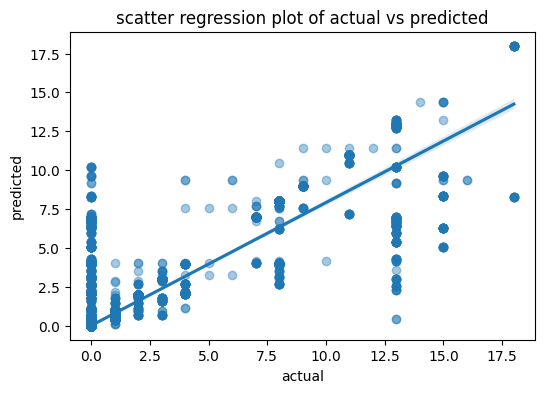

In [591]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model training (for Driver Simulation)

In [ ]:
df.dropna(inplace = True)

In [601]:
X = df[['Hour', 'direction', 'Min', 'Sec', 'Day_of_week', 'longitude','latitude','nearest_bus_stop']]
y = df['waiting_passengers']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [602]:
# XGBoost Regression Model
xg_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [603]:
# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## Model Evaluation

In [604]:
# Predictions
rf_preds = rf_model.predict(X_test)
xg_preds = xg_model.predict(X_test)

# Evaluation using RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
xg_rmse = np.sqrt(mean_squared_error(y_test, xg_preds))

print(f"Random Forest RMSE: {rf_rmse}")
print(f"XGBoost RMSE: {xg_rmse}")

print(rf_model.score(X_test, y_test))
print(xg_model.score(X_test, y_test))

Random Forest RMSE: 0.049118117323779735
XGBoost RMSE: 0.22469830234465157
0.9945932614073328
0.8868507742881775


In [605]:
demand_model_driver = rf_model

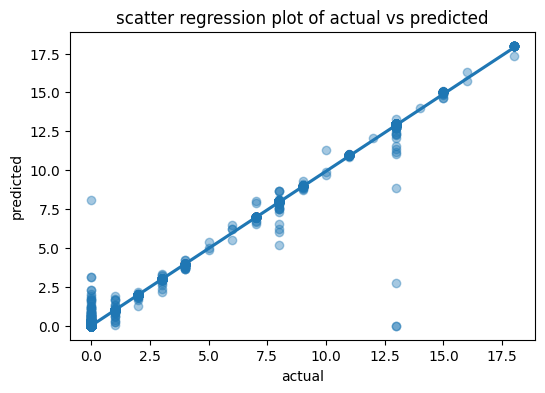

In [606]:
# Plot real vs predicted values
plt.figure(figsize=(6, 4))
sns.regplot(x=y_test, y=rf_preds, data=df, scatter_kws={'alpha':0.4})
plt.title('scatter regression plot of actual vs predicted')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

## Model Testing

In [554]:
df[(df['Board'] == 1) & (df['Hour'] == 4) & (df['direction'] == 1) & (df['Min'] == 15) & df['Day_of_week'] = ]['nearest_bus_stop'].value_counts()

nearest_bus_stop
20.0    4
Name: count, dtype: int64

In [568]:
X = df[['Hour', 'Min', 'direction', 'Date', 'Sec', 'Day_of_week', 'nearest_bus_stop']]

KeyError: "['Date'] not in index"

In [560]:
print

<function print>

In [561]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, rf_model.predict([[i, j, 1, 1, 0]]))

4 0 1 [0.]
4 1 1 [0.]
4 2 1 [0.]
4 3 1 [0.]
4 4 1 [0.]
4 5 1 [0.]
4 6 1 [0.]
4 7 1 [0.]
4 8 1 [0.]
4 9 1 [0.]
4 10 1 [0.]
4 11 1 [0.]
4 12 1 [0.]
4 13 1 [0.]
4 14 1 [0.]
4 15 1 [0.]
4 16 1 [0.]
4 17 1 [0.]
4 18 1 [0.]
4 19 1 [0.]
4 20 1 [0.]
4 21 1 [0.]
4 22 1 [0.]
4 23 1 [0.]
4 24 1 [0.]
4 25 1 [0.]
4 26 1 [0.]
4 27 1 [0.]
4 28 1 [0.]
4 29 1 [0.]
4 30 1 [0.]
4 31 1 [0.]
4 32 1 [0.]
4 33 1 [0.]
4 34 1 [0.]
4 35 1 [0.]
4 36 1 [0.]
4 37 1 [0.]
4 38 1 [0.]
4 39 1 [0.]
4 40 1 [0.]
4 41 1 [0.]
4 42 1 [0.]
4 43 1 [0.]
4 44 1 [0.]
4 45 1 [0.]
4 46 1 [0.]
4 47 1 [0.]
4 48 1 [0.]
4 49 1 [0.]
4 50 1 [0.]
4 51 1 [0.]
4 52 1 [0.]
4 53 1 [0.]
4 54 1 [0.]
4 55 1 [0.]
4 56 1 [0.]
4 57 1 [0.]
4 58 1 [0.]
4 59 1 [0.]
5 0 1 [0.]
5 1 1 [0.]
5 2 1 [0.]
5 3 1 [0.]
5 4 1 [0.]
5 5 1 [0.]
5 6 1 [0.]
5 7 1 [0.]
5 8 1 [0.]
5 9 1 [0.]
5 10 1 [0.]
5 11 1 [0.]
5 12 1 [0.]
5 13 1 [0.]
5 14 1 [0.]
5 15 1 [0.]
5 16 1 [0.]
5 17 1 [0.]
5 18 1 [0.]
5 19 1 [0.]
5 20 1 [0.]
5 21 1 [0.]
5 22 1 [0.]
5 23 1 [0.]
5 24 1 [0.]


In [ ]:
for i in range(4, 24):
  for j in range(0, 60):
      print(i, j, 1, xg_model.predict([[i, j, 1, 1, 10]]))

4 0 1 [0.5356792]
4 1 1 [0.5358939]
4 2 1 [0.5366601]
4 3 1 [0.5193796]
4 4 1 [0.51886785]
4 5 1 [0.51886785]
4 6 1 [0.508883]
4 7 1 [0.5075498]
4 8 1 [0.5147137]
4 9 1 [0.5147137]
4 10 1 [0.40875277]
4 11 1 [0.40875277]
4 12 1 [0.40796664]
4 13 1 [0.5098065]
4 14 1 [0.5094983]
4 15 1 [0.5094983]
4 16 1 [0.5122629]
4 17 1 [0.5131296]
4 18 1 [0.5131296]
4 19 1 [0.51364046]
4 20 1 [0.51364046]
4 21 1 [0.51364046]
4 22 1 [0.50590056]
4 23 1 [0.50590056]
4 24 1 [0.11009039]
4 25 1 [0.7226036]
4 26 1 [0.6297955]
4 27 1 [0.68671644]
4 28 1 [0.69668967]
4 29 1 [0.8582666]
4 30 1 [0.7848078]
4 31 1 [0.7695035]
4 32 1 [1.1396378]
4 33 1 [0.54591066]
4 34 1 [-0.04948987]
4 35 1 [-0.03866452]
4 36 1 [-0.03091966]
4 37 1 [-0.02908542]
4 38 1 [-0.02825015]
4 39 1 [-0.02925751]
4 40 1 [-0.01760429]
4 41 1 [-0.01386812]
4 42 1 [0.02251188]
4 43 1 [0.00846848]
4 44 1 [-0.00627748]
4 45 1 [-0.00478945]
4 46 1 [0.01568951]
4 47 1 [1.1689701]
4 48 1 [0.37423185]
4 49 1 [0.8783565]
4 50 1 [0.96744347]
4 5